In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

# Importação dos dados
* Dados do dia inteiro, agregado a cada 1h pela média
* Colunas:
  * momento 	
  * temp_celsius 	
  * pressao 	
  * precipitacao 	
  * winddirection_deg 	
  * windspeed_mps 	
  * ta_real 	
  * tb_real 	
  * tc_real 	
  * ampa_real 	
  * ampb_real 	
  * ampc_real 	
  * pa 	
  * pb 	
  * pc 	
  * qa 	
  * qb 	
  * qc 	
  * sa 	
  * sb 	
  * sc 	
  * p3 	
  * q3 	
  * s3

In [2]:
raw = pd.read_csv ('../datasets/clima3.csv', sep=',')

# Exploratory data analysis

In [30]:
raw.head(100)

,momento,temp_celsius,pressao,precipitacao,winddirection_deg,windspeed_mps,ta_real,tb_real,tc_real,ampa_real,ampb_real,ampc_real,pa,pb,pc,qa,qb,qc,sa,sb,sc,p3,q3,s3
0,2019-02-18 00:00:00-03,24,1013.0,0.0,127.4,5.3,13.880140,13.786562,13.781664,2.666798,2.689003,3.100724,20.282296,21.010239,23.999686,6.027498,1.970950,4.931947,21.165807,21.117332,24.513005,65.292220,12.930396,66.796144
1,2019-02-18 01:00:00-03,24,1012.6,0.1,130.6,4.9,13.869806,13.778629,13.781847,2.689972,2.721267,3.147577,20.404273,21.261324,24.327353,6.275138,2.098956,5.238918,21.355956,21.376070,24.896611,65.992950,13.613012,67.628636
2,2019-02-18 02:00:00-03,24,1012.3,0.9,129.1,4.0,13.882969,13.789441,13.798830,2.639683,2.656525,3.092916,20.055105,20.782894,23.982937,6.082284,1.856832,4.909791,20.963697,20.876075,24.492873,64.820936,12.848906,66.332644
3,2019-02-18 03:00:00-03,23,1011.8,2.4,134.6,3.9,13.907222,13.811971,13.823028,2.667236,2.637464,3.116602,20.193343,20.640285,24.214494,6.476695,1.988198,4.936171,21.213473,20.746577,24.720932,65.048122,13.401064,66.680982
4,2019-02-18 04:00:00-03,23,1011.3,3.7,154.4,3.9,13.908322,13.808842,13.822305,2.656345,2.653628,3.104772,20.146683,20.762062,24.086712,6.365113,2.075066,5.075391,21.133691,20.874025,24.624623,64.995457,13.515570,66.632339
5,2019-02-18 05:00:00-03,23,1011.2,4.0,159.9,4.8,13.884689,13.787096,13.801304,2.897138,2.777602,3.396907,21.777492,21.741819,26.436732,7.467505,1.970096,5.031340,23.048956,21.843735,26.929657,69.956043,14.468941,71.822348
6,2019-02-18 06:00:00-03,23,1011.9,0.6,160.3,4.1,13.899920,13.808258,13.817083,3.236381,3.128860,3.720592,24.797172,24.624698,29.173378,7.152532,1.884152,4.724080,25.825378,24.705089,29.562007,78.595247,13.760763,80.092475
7,2019-02-18 07:00:00-03,23,1012.3,0.8,156.2,4.3,13.934705,13.842203,13.837214,4.731784,4.604317,5.068391,37.459482,36.527925,40.188226,5.488051,1.511883,3.194494,37.911181,36.583812,40.341493,114.175632,10.194428,114.836486
8,2019-02-18 08:00:00-03,23,1012.6,0.8,157.5,4.8,13.837035,13.765226,13.742380,8.052386,7.837174,8.642792,63.432638,61.949855,68.175091,10.113237,3.143689,6.035142,64.247154,62.141379,68.460008,193.557585,19.292068,194.848542
9,2019-02-18 09:00:00-03,23,1012.6,7.0,172.0,4.7,13.812270,13.752212,13.714459,10.901844,10.422396,11.571056,85.463085,82.337667,91.065010,15.348465,6.067972,8.825490,86.846473,82.614722,91.509606,258.865762,30.241927,260.970801


In [31]:
raw.describe()

,temp_celsius,pressao,precipitacao,winddirection_deg,windspeed_mps,ta_real,tb_real,tc_real,ampa_real,ampb_real,ampc_real,pa,pb,pc,qa,qb,qc,sa,sb,sc,p3,q3,s3
count,697.000000,697.000000,697.000000,697.000000,697.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,25.107604,1012.919082,0.197274,190.877762,3.388666,13.843428,13.766670,13.728097,9.232230,8.356499,9.806376,69.923224,64.996825,76.224131,22.076549,10.931765,12.783431,73.513837,66.122028,77.397094,211.144180,45.791745,217.032958
std,2.232509,3.322398,1.188405,111.034737,1.793627,0.061312,0.053534,0.068282,8.531797,7.376259,8.710011,64.332912,57.198168,67.807496,22.563618,13.586406,12.135542,68.052466,58.687457,68.865135,189.236752,47.823045,195.502970
min,21.000000,1003.000000,0.000000,0.400000,0.400000,13.686465,13.645807,13.534987,0.398289,0.286784,0.724720,1.499827,1.936987,4.140567,0.354391,-3.297385,0.904538,3.370638,2.306927,4.763933,7.973632,2.180793,10.604037
25%,23.000000,1010.700000,0.000000,123.600000,2.200000,13.799046,13.726670,13.681508,3.087414,2.960893,3.473058,23.574381,22.972115,26.785569,6.460333,2.110997,4.496708,24.516085,23.141440,27.433117,73.945617,13.770642,75.879293
50%,25.000000,1013.400000,0.000000,178.000000,3.100000,13.845726,13.767558,13.728622,3.670608,3.552353,4.135967,28.007535,27.620332,32.035057,8.904344,3.710781,6.074587,29.275260,27.986191,32.840835,87.619952,17.986112,90.190023
75%,26.000000,1015.300000,0.100000,316.400000,4.200000,13.885750,13.805598,13.777099,15.511372,14.067127,16.628575,118.896345,110.503775,130.132915,37.996407,17.255240,20.265197,123.858626,112.088075,131.876913,357.784258,74.560727,364.392954
max,34.000000,1020.000000,24.600000,359.500000,10.700000,14.076137,13.997172,13.929806,36.232299,31.140878,35.307741,272.907496,237.757791,273.956809,94.700927,68.800393,53.125840,288.888829,247.521993,278.910834,784.622095,215.775025,815.321656


                   temp_celsius   pressao  precipitacao  winddirection_deg  \
temp_celsius           1.000000 -0.349028     -0.056318          -0.121996   
pressao               -0.349028  1.000000     -0.048650          -0.178397   
precipitacao          -0.056318 -0.048650      1.000000          -0.019906   
winddirection_deg     -0.121996 -0.178397     -0.019906           1.000000   
windspeed_mps          0.128400  0.050068      0.106223          -0.093847   
ta_real               -0.351960  0.075788     -0.041542           0.116381   
tb_real               -0.295012  0.016478     -0.021671           0.097773   
tc_real               -0.508964  0.094644     -0.021363           0.152925   
ampa_real              0.202864 -0.158952      0.062203          -0.178912   
ampb_real              0.195695 -0.160534      0.065175          -0.172831   
ampc_real              0.205349 -0.167938      0.059481          -0.178962   
pa                     0.195992 -0.155806      0.064800         

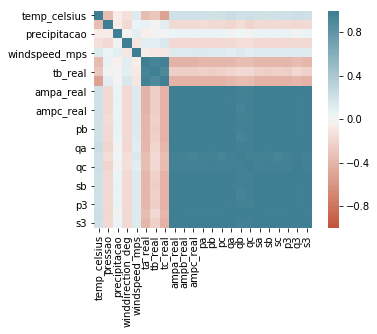

In [32]:
corr = raw.corr(method='pearson')
print (corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
pd.plotting.scatter_matrix(raw, alpha=0.5, figsize=(20, 20), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f313f9a7c88>,
      dtype=object)

Text(0, 0.5, 'ta_real')

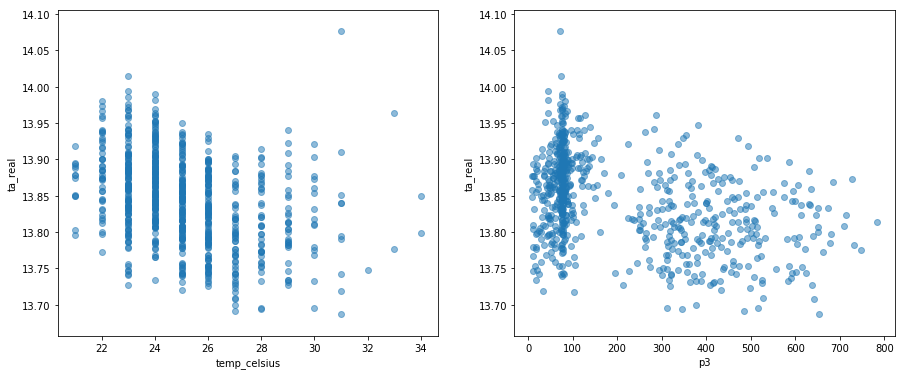

In [4]:
# tensão vs temperatura e potência
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.scatter(raw['temp_celsius'], raw['ta_real'], Alpha=0.5)
ax1.set_xlabel("temp_celsius")
ax1.set_ylabel("ta_real")
ax2.scatter(raw['p3'], raw['ta_real'], Alpha=0.5)
ax2.set_xlabel("p3")
ax2.set_ylabel("ta_real")

Text(0, 0.5, 'p3')

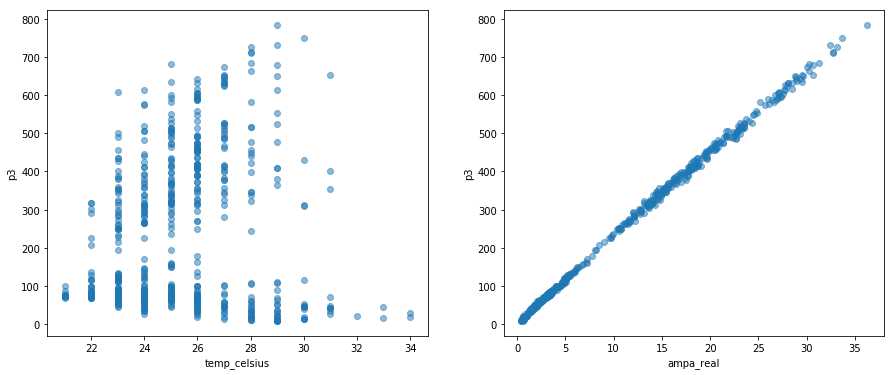

In [5]:
# potência vs tempetura e corrente
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.scatter(raw['temp_celsius'], raw['p3'], Alpha=0.5)
ax1.set_xlabel("temp_celsius")
ax1.set_ylabel("p3")
ax2.scatter(raw['ampa_real'], raw['p3'], Alpha=0.5)
ax2.set_xlabel("ampa_real")
ax2.set_ylabel("p3")

In [6]:
raw['momento'] = pd.to_datetime (raw['momento'])
raw = raw.set_index(raw.momento)
resampled = raw.resample('B').agg({
    'ta_real': ['mean'],
    'ampa_real': ['mean'],
    'temp_celsius': ['mean', 'std'],
    'p3': ['mean']
})

resampled.columns = resampled.columns.map('_'.join)
resampled = resampled.dropna()


Text(0, 0.5, 'ta_real')

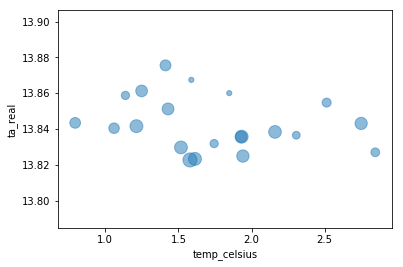

In [7]:

plt.scatter(resampled['temp_celsius_std'], resampled['ta_real_mean'], s=resampled['p3_mean']/2, Alpha=0.5)
plt.xlabel('temp_celsius')
plt.ylabel('ta_real')

# Model Training

In [8]:
raw = raw.drop('momento', axis=1)
raw = raw.dropna()

In [9]:
from sklearn.model_selection import train_test_split 
X = raw.drop('p3', axis=1)
y = raw ['p3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [10]:
lm = LinearRegression()
lm.fit (X_train, y_train)
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
temp_celsius,1.746027e-14
pressao,1.425932e-15
precipitacao,-1.116592e-14
winddirection_deg,-4.587413e-16
windspeed_mps,-2.981326e-14
ta_real,-4.624018e-12
tb_real,2.115638e-12
tc_real,2.283275e-12
ampa_real,8.817533e-13
ampb_real,-4.144416e-12


# Model Evaluation

MAE: 4.3858165371641973e-13
RMSE: 6.925991982358661e-13


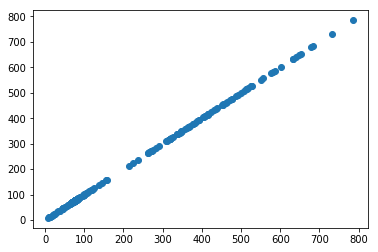

In [11]:
from sklearn import metrics
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.scatter(y_test,predictions)